# Goodreads: Exploratory Data Analysis
#### by Daniel Walker, 26th of Septemeber 2019

## Contents  
  
1. Introduction 
2. Describing the data  
3. Supporting Functions  
4. Exploritory Data Analysis  
    1. Who are the top 10 authors by books published?  
    2. What are the 5 most common language of books?   
    3. Who are the top 5 authors by average rating?  
    4. Who are the top 5 authors by number of ratings? (No lower limit)  
    5. Who are the top 5 authors by number of ratings? (Num of Ratings > 100)    
    6. Who are the top 5 authors by number of ratings? (Num of Ratings > 1000)   
    7. Who are the top 5 authors by average number of page per book?  
    8. What are the top 10 books by average rating? (No limit)  
    9. What are the top 10 books by average rating? (Num of Ratings > 100)    
    10. What are the top 10 books by average rating? (Num of Ratings > 1000)      
    11. Which books are top 5 based on their number of ratings?  
    12. What is the average ratings of all books in the dataset?  
    13. Is there a relationship between average rating and number of ratings for books?    
    14. Is there a relationship between the number of books published and the average rating of all those books per author?  
    15. What is the relationship between the number of pages of a book and its number of rating?  
5. Learning Takeaways 
6. Summary    

## Introduction
  
Goodreads: Exploratory Data Analysis is a project I have been working through with two main aims; firstly to find interesting things from the data, and secondly to learn and play with seaborn and its associated libraries.
  
The data set was sourced on the the 16th of September 2019 at 13:23gmt from [Kaggle.](https://www.kaggle.com/jealousleopard/goodreadsbooks) The dataset was chosen as it was promised to be clean, (so I could focus more on the visulisation rather than data cleaning/engineering), and also that I like to read which makes it an interesting subject.

Questions, Exploration, Ideas

Top 10 Authors by number of titles published[DONE]    
Top 5 Authors by average rating.[ DONE ]  
Top 5 Authors by number of ratings.[ DONE ]  
(Any limit)  
(over 100)   
(over 1000)  
  
Top 5 Authors by avg number of pages per book.[DONE]
(possibly not a graph (see graph))  
   
Top 10 books by rating.[ DONE ]  
(Any limit)  
(over 100)  
(over 1000) 
  
Top 5 books by number of ratings. [ DONE ]   
 
  
Average ratings of all books. [ DONE ]  
  
  
Relationships  
Between ratings and no. of ratings. [ DONE ]  
Between number of books published and avg rating(per author)[ DONE ]  
Between number of pages and number of ratings.[ DONE ]  

  
[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[  
  
  
Housekeeping.(notebook)    
Cut out all excess code noise. [ DONE ]   
TITLE[ DONE ]  
Order jupyter notebook.   
Create contents (hyperlink later)  [ DONE ]  
Write introduction.[ DONE ]   
Write insights/thoughts on graphs and data.  
(Talk about making specific minimalist graphs, how to display data otherwise(for the one where the graph wont work well at all)).  
Write conclusion on data / what I've learnt.  
HYPERLINK CONTENTS  


# 2 Describing the data

### Loading libraries and filtering warnings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/books.csv", error_bad_lines=False)

In [4]:
df.set_index(['bookID'], inplace=True)

In [5]:
df.tail(2)

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,743201116,9.780000e+12,eng,224,1550,38
47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9.780000e+12,eng,132,3572,33


In [1]:
# Mention isbn being object not number ect.
df.dtypes

NameError: name 'df' is not defined

Very shortly after importing the data (books.csv), I noticed there were a few errors. These were fixed though various methods; opening the csv in excel, changing datatypes with pandas, and using pythons built in methods like .strip() and string formatting.
  
Some of the errors include:

- isbn13 numbers being displayed with scientific notation, therefore not usable as numbers.  
- Author's names having extra spaces and tabs in the string.  
- Some of the rows had data pushed one column to the right, making some rows have 11 columns of data rather than the expected 10.

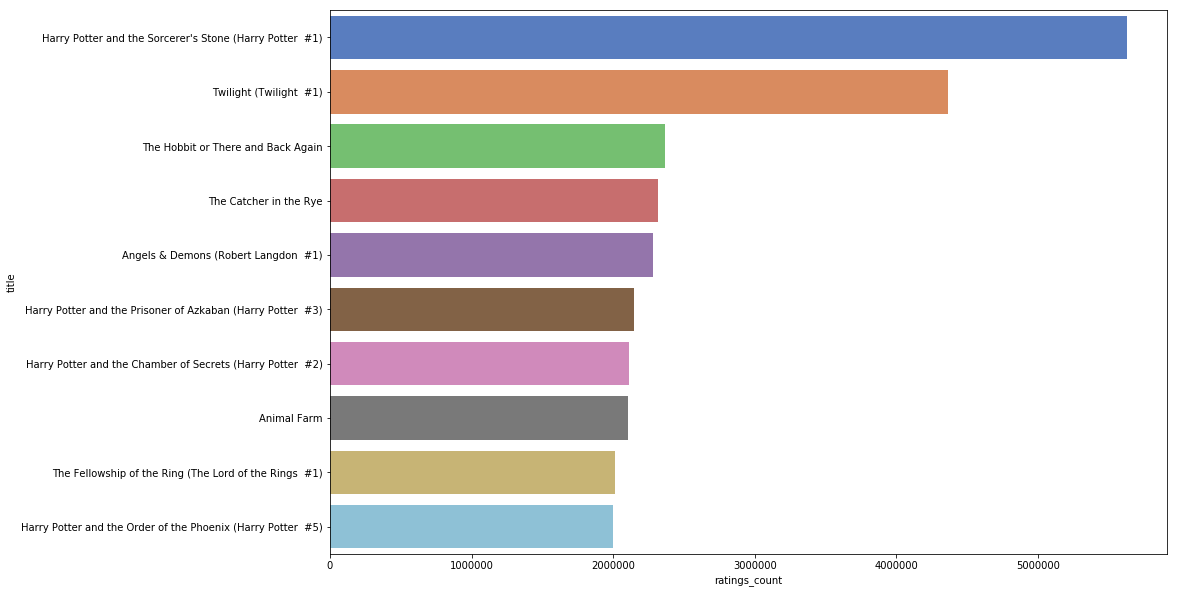

In [7]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='muted')

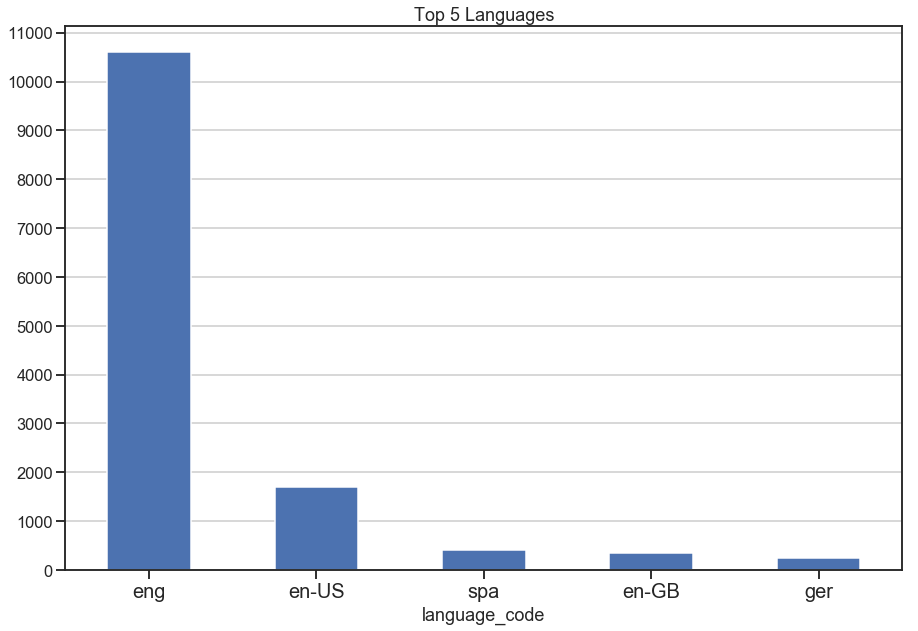

In [32]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax =  df.groupby('language_code')['title'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Languages')
plt.xticks(fontsize = 20, rotation='horizontal')
plt.yticks([i*1000 for i in range(0, 12)])
plt.grid(axis='y')

In [9]:
def minimalhbargraph():
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist. (Have to use ax.text to put the )
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')

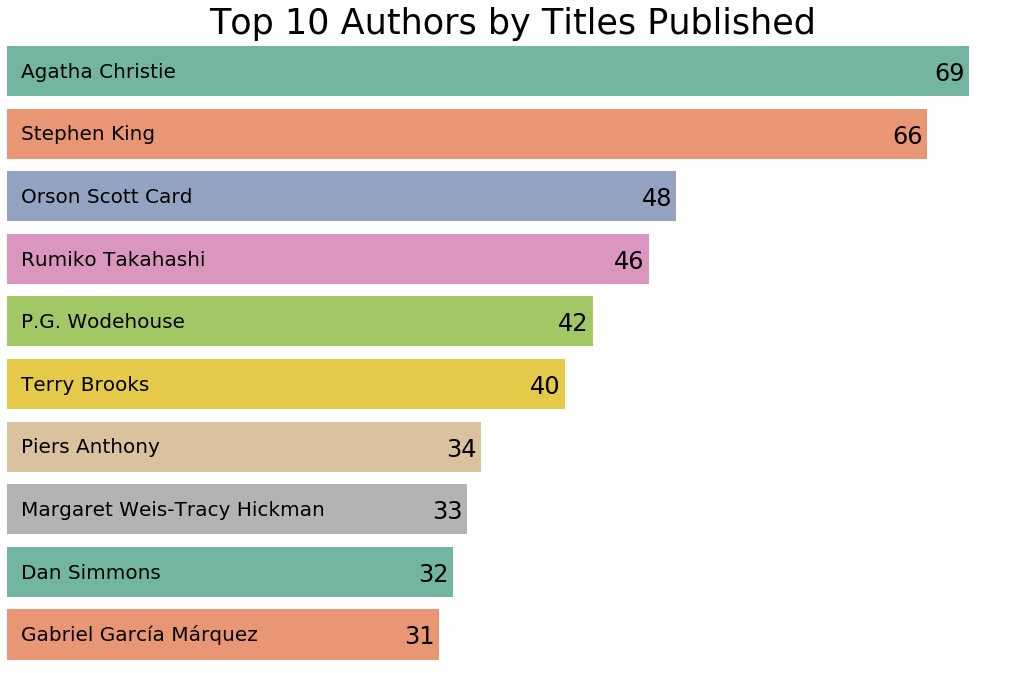

In [10]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='Set2')
ax.set_title("Top 10 Authors by Titles Published", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(most_books.index[num]), fontsize = 20, color = 'k')
    num += 1


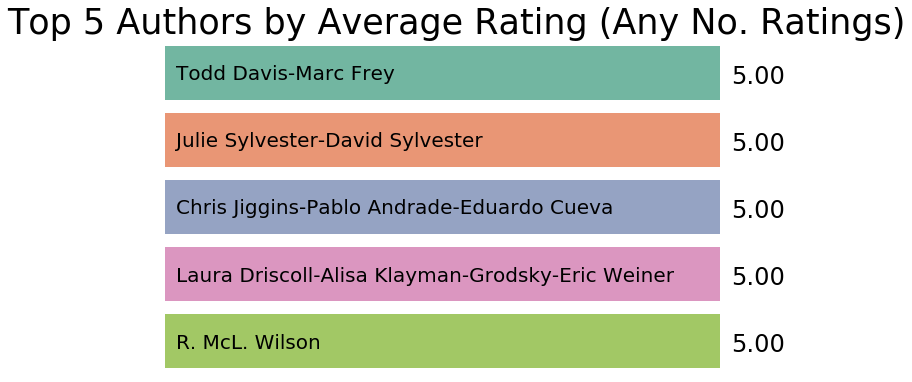

In [11]:
rating_author = df.groupby('authors').mean()
top_5_rating_author = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 100]
top_5_rating_author_over100 = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 1000]
top_5_rating_author_over1000 = rating_author.sort_values('average_rating', ascending=False).head(5)


plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author['average_rating'], top_5_rating_author.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Any No. Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author.index[num]), fontsize = 20, color = 'k')
    num += 1



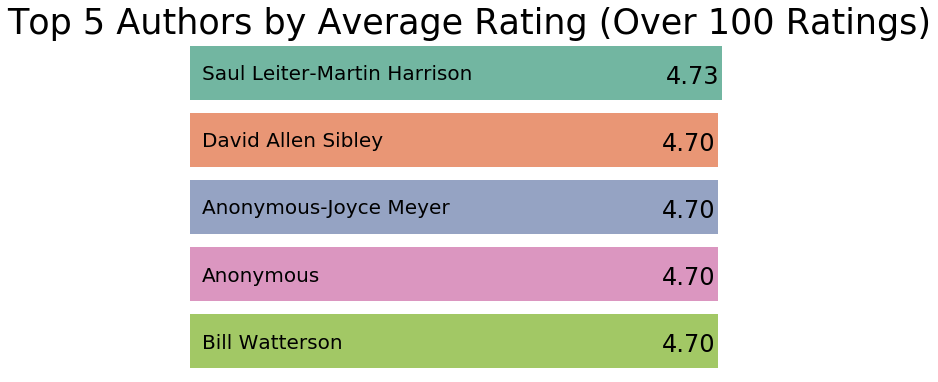

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over100['average_rating'], top_5_rating_author_over100.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 100 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

    


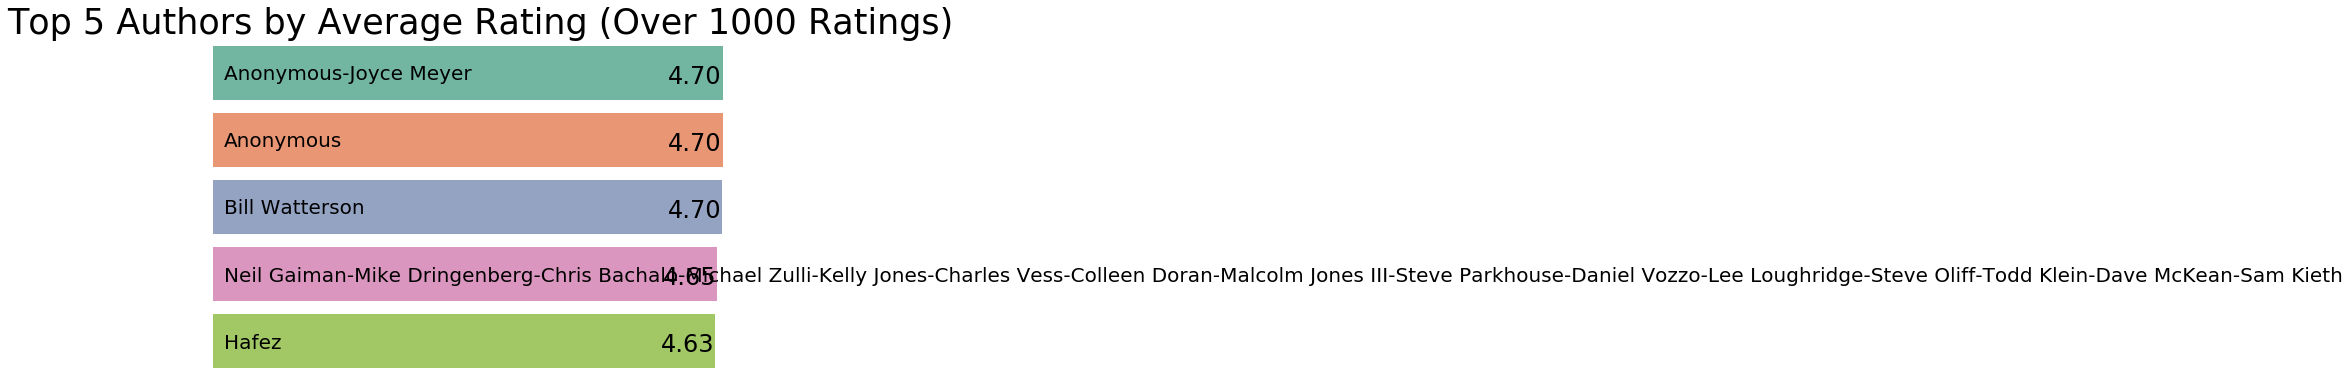

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over1000['average_rating'], top_5_rating_author_over1000.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 1000 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

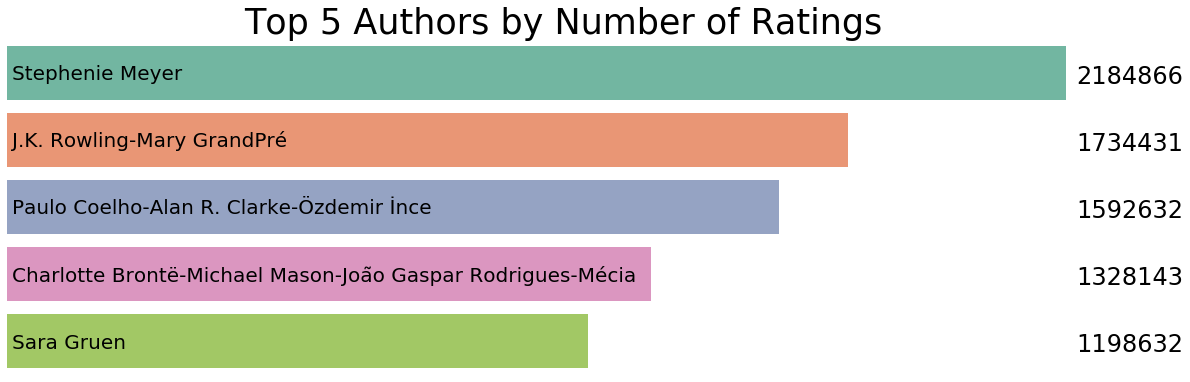

In [14]:
rating_author = df.groupby('authors').mean()
top_5_num_ratings = rating_author.sort_values('ratings_count', ascending=False).head(5)

plt.figure(figsize=(16.5, 6))
ax = sns.barplot(top_5_num_ratings['ratings_count'], top_5_num_ratings.index, palette='Set2')
ax.set_title("Top 5 Authors by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(2204866, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(10000 , i.get_y()+0.5, str(top_5_num_ratings.index[num]), fontsize = 20, color = 'k')
    num += 1


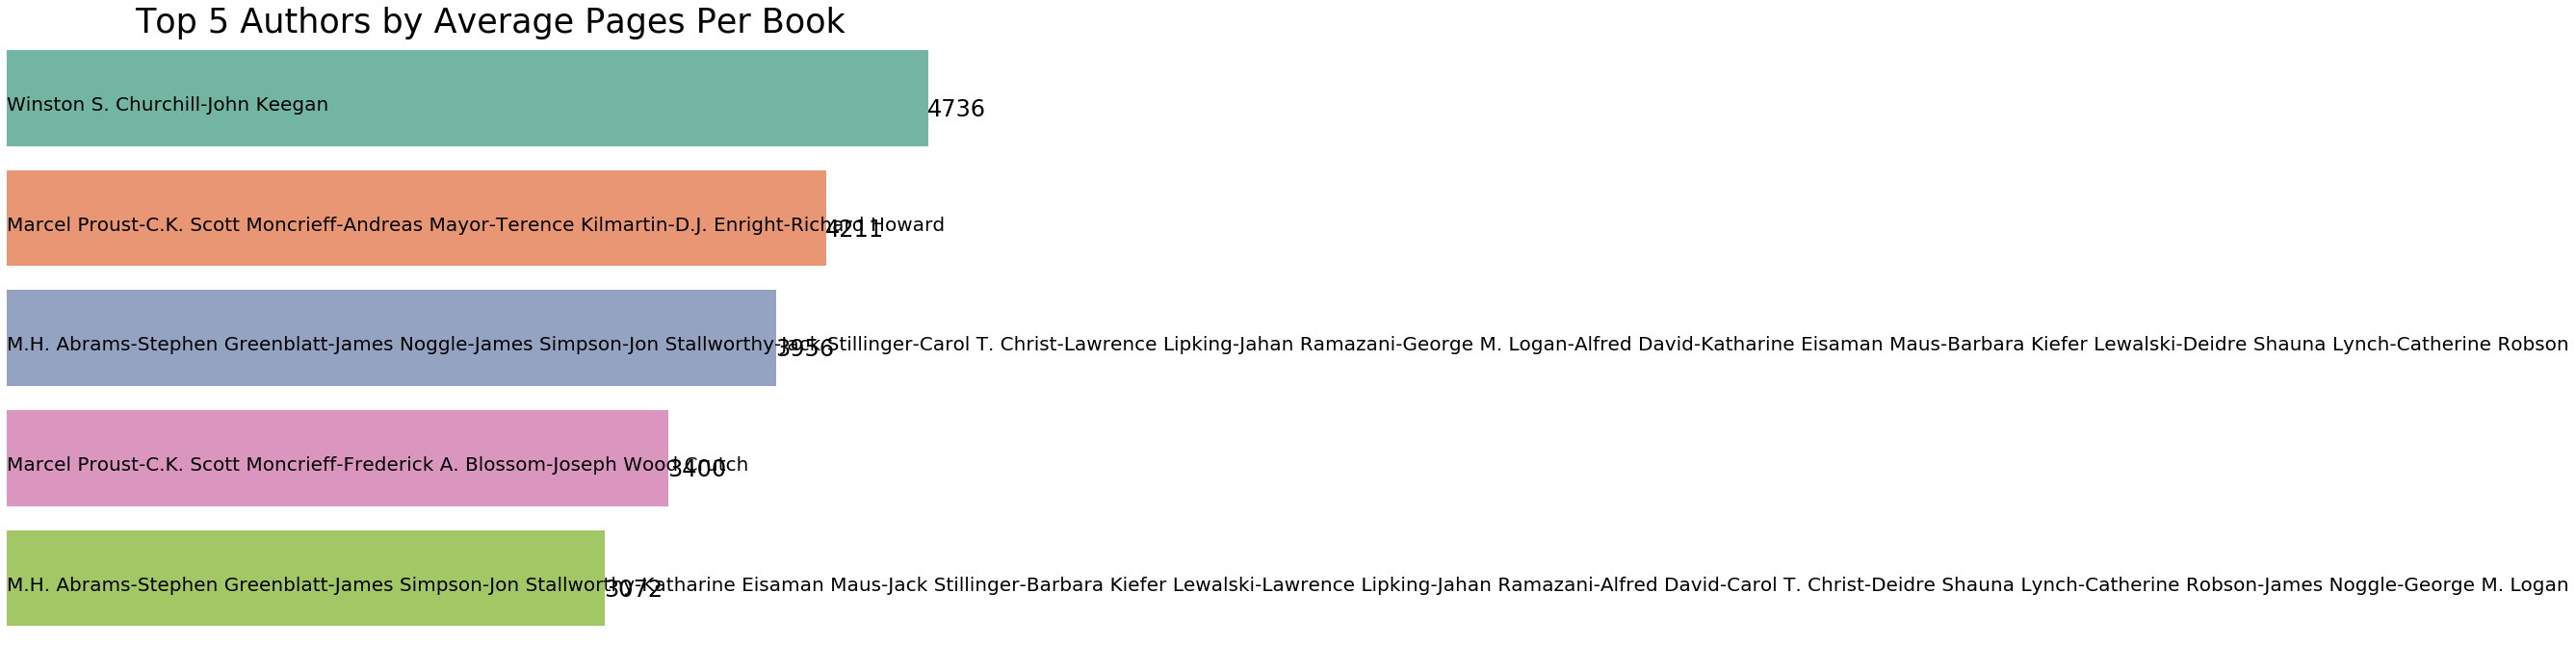

In [15]:
#Attempted graphing of the top 5 authors by avg number of page per book.

author_by_avg_pages = df.groupby('authors')['# num_pages'].mean().reset_index().sort_values('# num_pages', ascending=False).head(5).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(author_by_avg_pages['# num_pages'], author_by_avg_pages.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Pages Per Book", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(author_by_avg_pages.index[num]), fontsize = 20, color = 'k')
    num += 1


In [16]:
#Very simple way of displaying the above graph in a slightly more readable way.
#Thinking of using this instead of graph.

for i in range(0,5):
    print('The authors {} average {:.0f} pages per book they have published.'.format(author_by_avg_pages.index[i], author_by_avg_pages['# num_pages'][i]) +'\n')

The authors Winston S. Churchill-John Keegan average 4736 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Andreas Mayor-Terence Kilmartin-D.J. Enright-Richard Howard average 4211 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Noggle-James Simpson-Jon Stallworthy-Jack Stillinger-Carol T. Christ-Lawrence Lipking-Jahan Ramazani-George M. Logan-Alfred David-Katharine Eisaman Maus-Barbara Kiefer Lewalski-Deidre Shauna Lynch-Catherine Robson average 3956 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Frederick A. Blossom-Joseph Wood Crutch average 3400 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Simpson-Jon Stallworthy-Katharine Eisaman Maus-Jack Stillinger-Barbara Kiefer Lewalski-Lawrence Lipking-Jahan Ramazani-Alfred David-Carol T. Christ-Deidre Shauna Lynch-Catherine Robson-James Noggle-George M. Logan average 3072 pages per book they ha

In [17]:
top_10_books_avg_rating = df.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 100]
top_10_books_avg_rating_over100 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 1000]
top_10_books_avg_rating_over1000 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

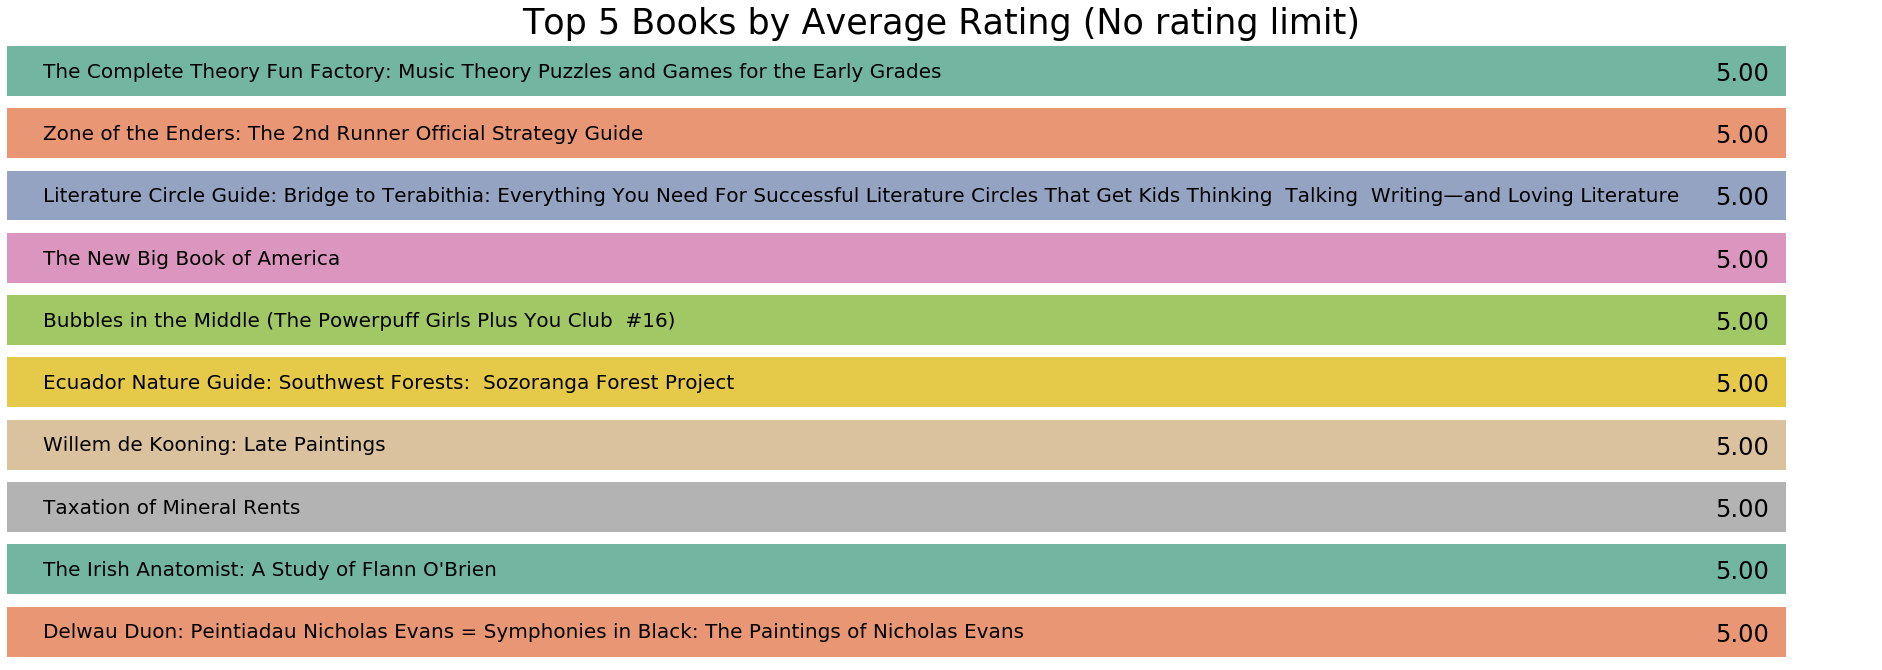

In [18]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(top_10_books_avg_rating['average_rating'], top_10_books_avg_rating.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (No rating limit)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.2, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating.index[num]), fontsize = 20, color = 'k')
    num += 1


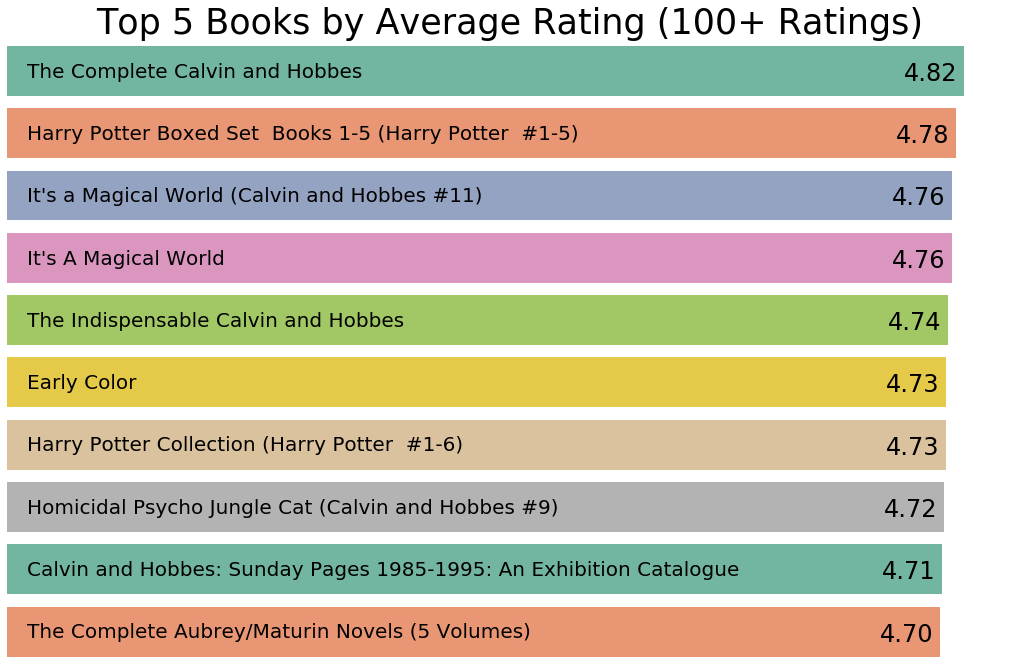

In [19]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over100['average_rating'], top_10_books_avg_rating_over100.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (100+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

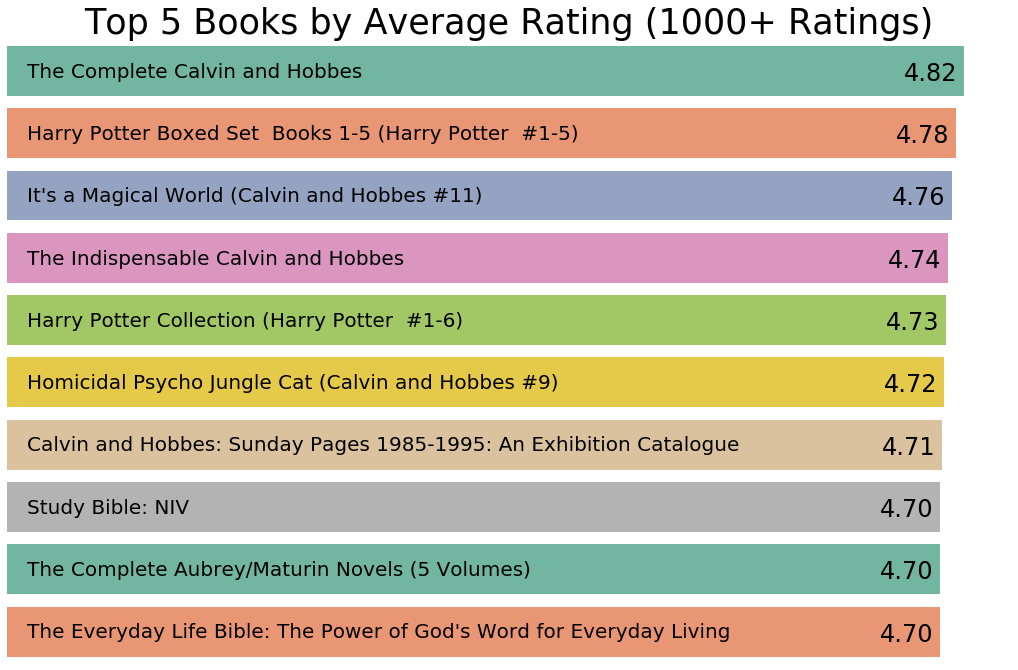

In [20]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over1000['average_rating'], top_10_books_avg_rating_over1000.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (1000+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

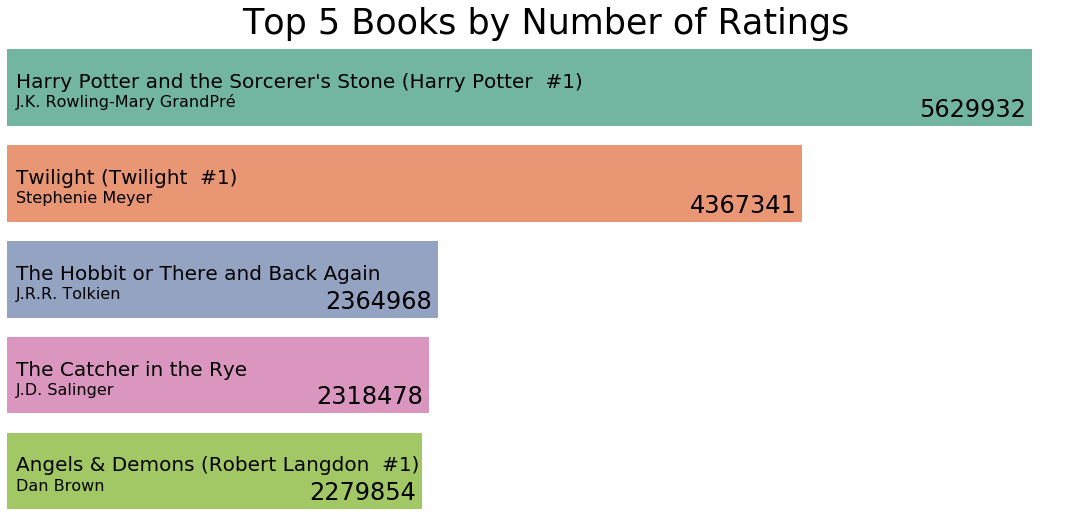

In [21]:
books_by_ratings = df.sort_values('ratings_count', ascending=False).head(5).set_index('title')

plt.figure(figsize=(16, 8))
ax = sns.barplot(books_by_ratings['ratings_count'], books_by_ratings.index, palette='Set2')
ax.set_title("Top 5 Books by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-620000, i.get_y()+0.7, "{0:.0f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(50000, i.get_y()+0.4, str(books_by_ratings.index[num]), fontsize = 20, color = 'k')
    ax.text(50000, i.get_y()+0.6, str(books_by_ratings['authors'][num]), fontsize = 16, color = 'k')
    num += 1

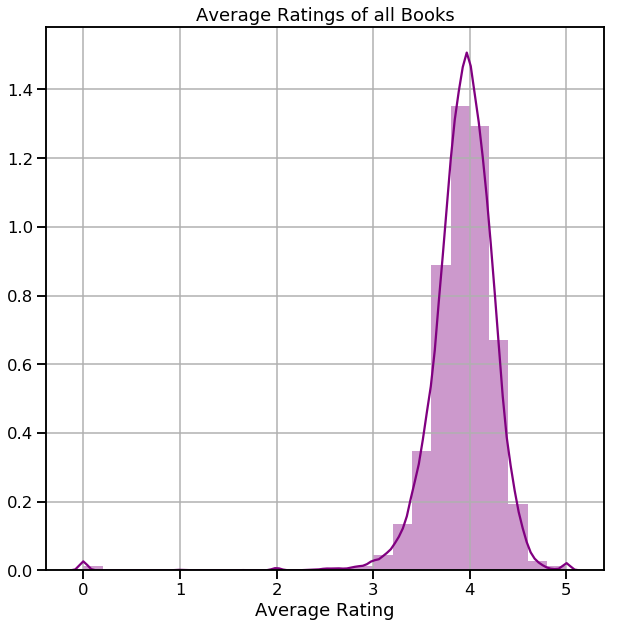

In [22]:
# Average raiting of all books in the dataset.
sns.set_context('talk')
plt.figure(figsize=(10,10))
rating = df.average_rating.astype(float)
ax = sns.distplot(rating, bins=25, color="Purple")
ax.set_xlabel("Average Rating")
ax.set_title("Average Ratings of all Books")
ax.grid()

<Figure size 2160x1440 with 0 Axes>

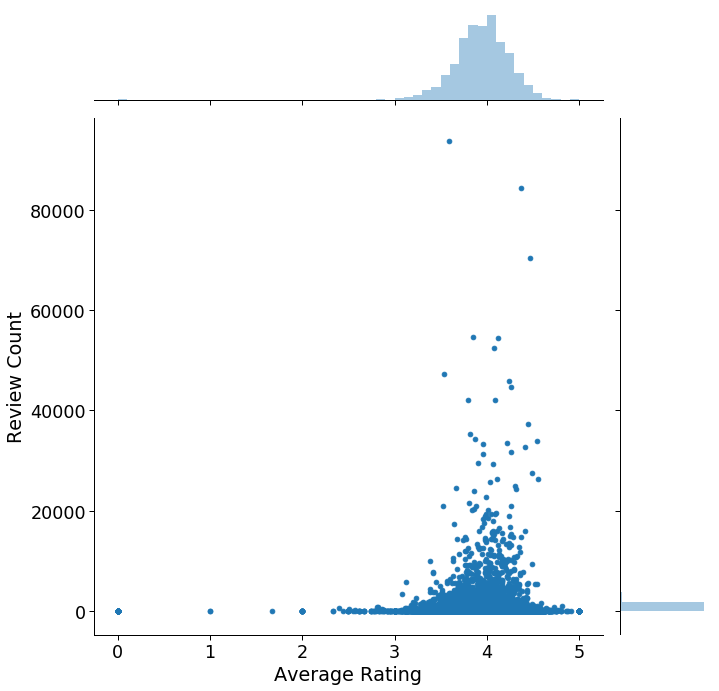

In [23]:
# Average rating of a book based on num of review counts
plt.figure(figsize=(30,20))
df.dropna(0, inplace=True)
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data=df[['text_reviews_count', 'average_rating']], height=10)
ax.set_axis_labels("Average Rating", "Review Count")
plt.show()

<Figure size 2160x1440 with 0 Axes>

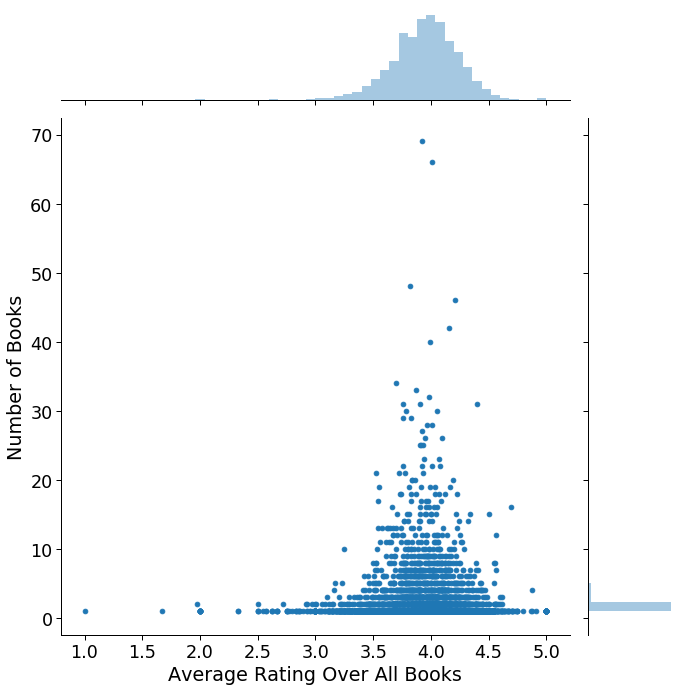

In [24]:
# Each data point is an author based on average rating over all their books.
most_books = df[['authors', 'title', 'average_rating']]
most_books_holder_1 = most_books.groupby('authors')['title'].count().reset_index().reset_index()
most_books_holder_2 = most_books.groupby('authors')['average_rating'].mean().reset_index()
most_books = pd.merge(most_books_holder_1, most_books_holder_2, on='authors', how='inner')
most_books = most_books[most_books.average_rating != 0]

plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10)
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

<Figure size 2160x1440 with 0 Axes>

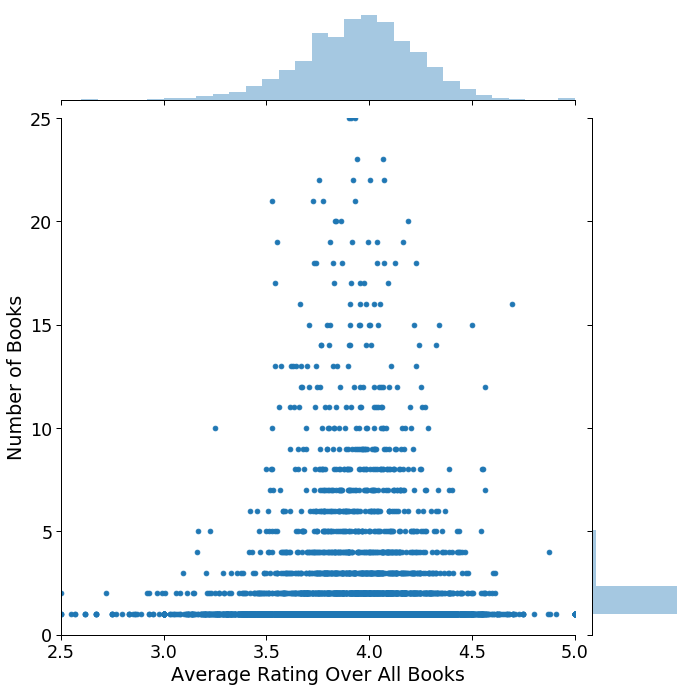

In [25]:
# Zoom in on the dense part of the above graph (MENTION x/y limits!)
plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10, xlim=(2.5, 5), ylim=(0, 25))
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

<Figure size 1080x720 with 0 Axes>

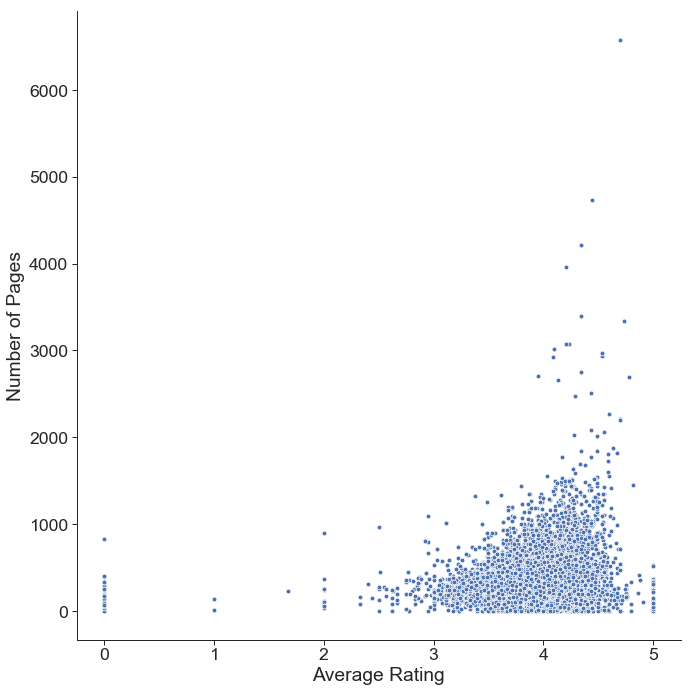

In [34]:
# Relationship between the average rating and number of pages of EACH BOOK.
pages_vs_ratings = df[["average_rating", '# num_pages']]
plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.set_context('paper', font_scale=2.0)
ax = sns.relplot(x="average_rating", y='# num_pages', data=pages_vs_ratings, height=10)
ax.set_axis_labels("Average Rating", "Number of Pages")